In [1]:
# Sequencial Gaussian Simulation

In [2]:
from volumetricspy.stats import Dot,CloudPoints, Exponential, NScaler, Spherical
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix

In [3]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df2 = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
dcp2 = CloudPoints().from_df(df2, x='X',y='Y', fields=['Facies','Porosity','Perm'])
dcp2.df()

,x,y,z,crs,Facies,Porosity,Perm
0,100.0,900.0,None,None,1.0,0.115359,5.736104
1,100.0,800.0,None,None,1.0,0.136425,17.211462
2,100.0,600.0,None,None,1.0,0.135810,43.724752
3,100.0,500.0,None,None,0.0,0.094414,1.609942
4,100.0,100.0,None,None,0.0,0.113049,10.886001
...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,1.0,0.109411,3.247265
285,190.0,419.0,None,None,0.0,0.099541,1.528003
286,920.0,379.0,None,None,0.0,0.094099,2.514597
287,60.0,149.0,None,None,0.0,0.100167,3.636854


<AxesSubplot:>

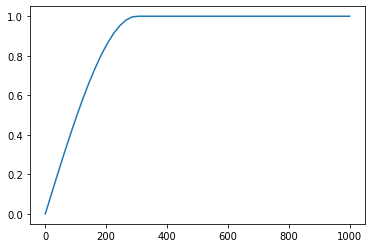

In [4]:
s = Spherical(
    sill = 1.,
    range = 300,
    nugget = 0.
)

s.plot(np.linspace(0,1000,50))

In [5]:
known = dcp2.sample(n=100)
sc = NScaler()
sc.fit(known.df()['Porosity'])
pnorm = sc.transform(known.df()['Porosity'])
known.add_field(pnorm, 'pnorm')
known.df()

,x,y,z,crs,Facies,Porosity,Perm,pnorm
0,420.0,99.0,None,None,1.0,0.110440,2.241469,-0.532848
1,980.0,79.0,None,None,1.0,0.121735,20.097792,-0.196547
2,700.0,300.0,None,None,1.0,0.140505,20.162171,0.345738
3,450.0,319.0,None,None,1.0,0.149704,20.672085,0.614482
4,900.0,679.0,None,None,0.0,0.079189,0.148384,-1.909960
...,...,...,...,...,...,...,...,...
95,900.0,200.0,None,None,1.0,0.140610,16.275875,0.348640
96,570.0,769.0,None,None,1.0,0.116616,6.448798,-0.344972
97,900.0,900.0,None,None,1.0,0.125826,4.851354,-0.075840
98,340.0,819.0,None,None,1.0,0.228790,5308.842566,6.361341


In [6]:
xn = np.linspace(0,1000,22)
yn = np.linspace(0,1000,22)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')


In [7]:
wm = s.sgs(known,cp2,v='pnorm')

df_un = wm.df()
df_un['porosity'] = sc.inverse(df_un['pnorm'])
df_un

484 total points, 394 unknown points


,x,y,z,crs,pnorm,porosity
0,0.0,0.000000,None,None,-0.218022,0.121016
1,0.0,47.619048,None,None,-0.229753,0.120620
2,0.0,95.238095,None,None,-1.032664,0.096082
3,0.0,142.857143,None,None,-0.803933,0.102242
4,0.0,190.476190,None,None,-0.693970,0.105606
...,...,...,...,...,...,...
479,1000.0,809.523810,None,None,-1.054894,0.095552
480,1000.0,857.142857,None,None,-0.241335,0.120212
481,1000.0,904.761905,None,None,0.649187,0.150799
482,1000.0,952.380952,None,None,0.757768,0.157252


In [8]:
wm.add_fields_from_df(df_un, ['porosity'])

wm.df()

,x,y,z,crs,pnorm,porosity
0,0.0,0.000000,None,None,-0.218022,0.121016
1,0.0,47.619048,None,None,-0.229753,0.120620
2,0.0,95.238095,None,None,-1.032664,0.096082
3,0.0,142.857143,None,None,-0.803933,0.102242
4,0.0,190.476190,None,None,-0.693970,0.105606
...,...,...,...,...,...,...
479,1000.0,809.523810,None,None,-1.054894,0.095552
480,1000.0,857.142857,None,None,-0.241335,0.120212
481,1000.0,904.761905,None,None,0.649187,0.150799
482,1000.0,952.380952,None,None,0.757768,0.157252


/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:200: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  d = ax.pcolormesh(xx,yy,df.values, **kwargs)
/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:201: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(d)


<AxesSubplot:xlabel='x', ylabel='y'>

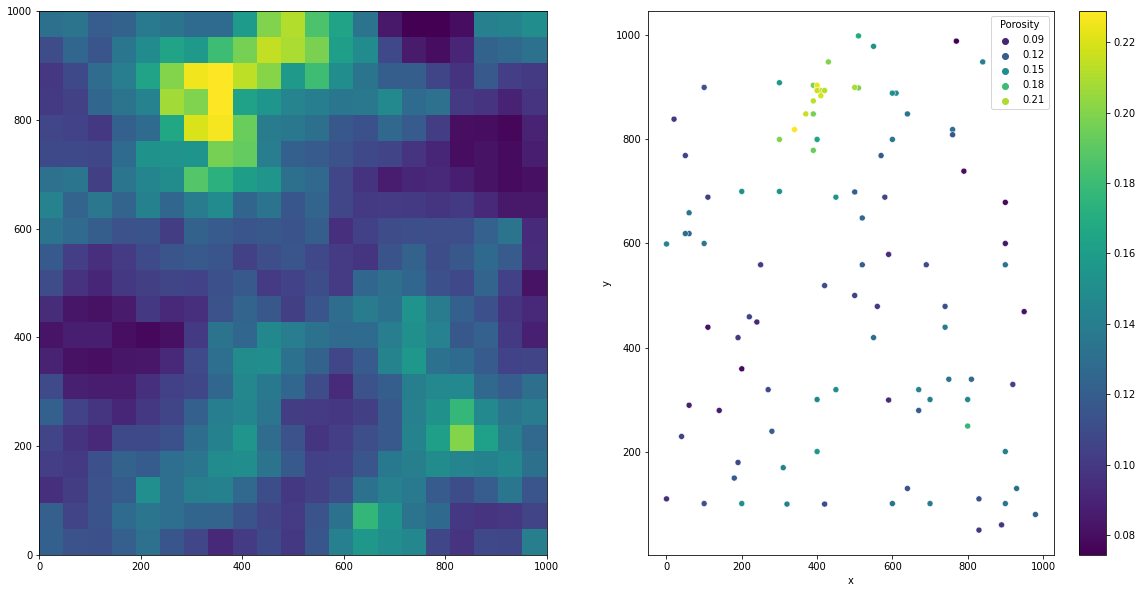

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wm.plot_mesh('porosity',ax=ax[0])
known.plot(ax=ax[1], hue='Porosity', palette='viridis')

In [10]:
data=wm.df()
data.describe()

,x,y,pnorm,porosity
count,484.000000,484.000000,484.000000,484.000000
mean,500.000000,500.000000,-0.308470,0.121940
std,302.421570,302.421570,0.927912,0.028991
min,0.000000,0.000000,-6.361341,0.074373
25%,238.095238,238.095238,-0.825236,0.101614
50%,500.000000,500.000000,-0.303514,0.118041
75%,761.904762,761.904762,0.203908,0.135349
max,1000.000000,1000.000000,6.361341,0.228790


In [11]:
1.06**2

1.1236000000000002

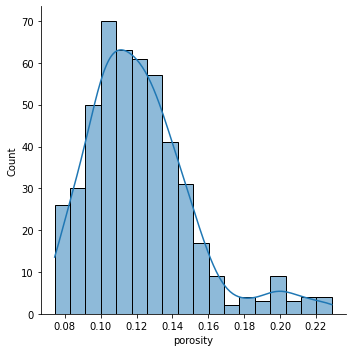

In [12]:
sns.displot(data=data.reset_index(), x='porosity', kde=True)

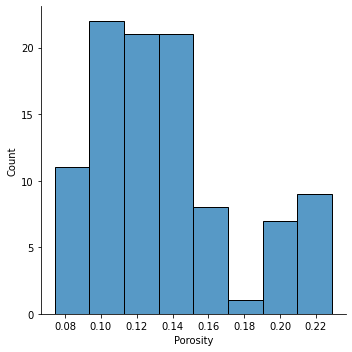

In [13]:
sns.displot(data=known.df().reset_index(), x='Porosity', kde=False)

In [14]:
wm.df().columns

Index(['x', 'y', 'z', 'crs', 'pnorm', 'porosity'], dtype='object')

<AxesSubplot:xlabel='lag', ylabel='var'>

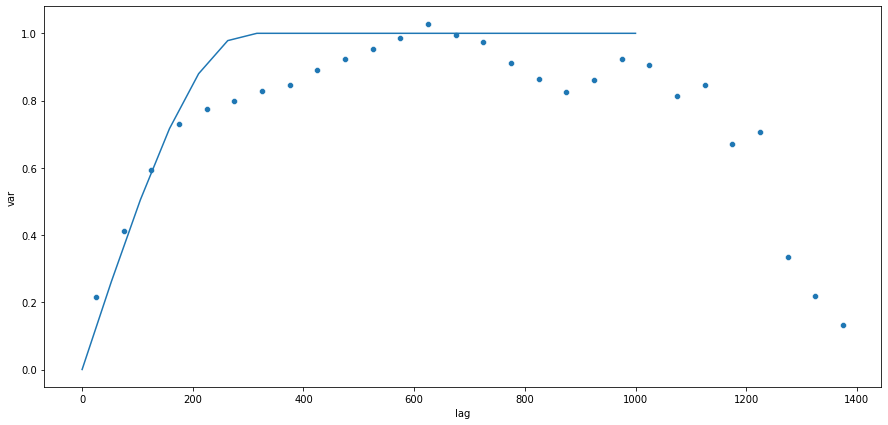

In [15]:
dfsm, sm = wm.variogram('pnorm',lag_dist=50, lag_tol=25,nlags=50)
fig, ax = plt.subplots(1,1,figsize=(15,7))

sns.scatterplot(data=sm, x='lag', y='var', ax=ax)
s.plot(np.linspace(0,1000,20),ax=ax)

In [16]:
wm.df()[['porosity','pnorm']].describe()

,porosity,pnorm
count,484.000000,484.000000
mean,0.121940,-0.308470
std,0.028991,0.927912
min,0.074373,-6.361341
25%,0.101614,-0.825236
50%,0.118041,-0.303514
75%,0.135349,0.203908
max,0.228790,6.361341
